Cloud Warehouse Compersion Chart
   index                        Shiprocket        Unnamed: 1  \
0      0                             Heads  Price (Per Unit)   
1      1     Inbound (Fresh Stock and RTO)             ₹4.00   
2      2                          Outbound             ₹7.00   
3      3                   Storage Fee/Cft            ₹25.00   
4      4  Customer Return with Detailed QC             ₹6.00   

             INCREFF  
0   Price (Per Unit)  
1                  4  
2                 11  
3  Rs 0.15/- Per Day  
4               15.5  

Expense IIGF
   index Recived Amount Unnamed: 1  \
0      0     Particular     Amount   
1      1       06-19-22       1000   
2      2       06-20-22       1500   
3      3       06-22-22        500   
4      4       06-23-22       2000   

                                             Expance Unnamed: 3  
0                                         Particular     Amount  
1                                          Large Bag        380  
2  

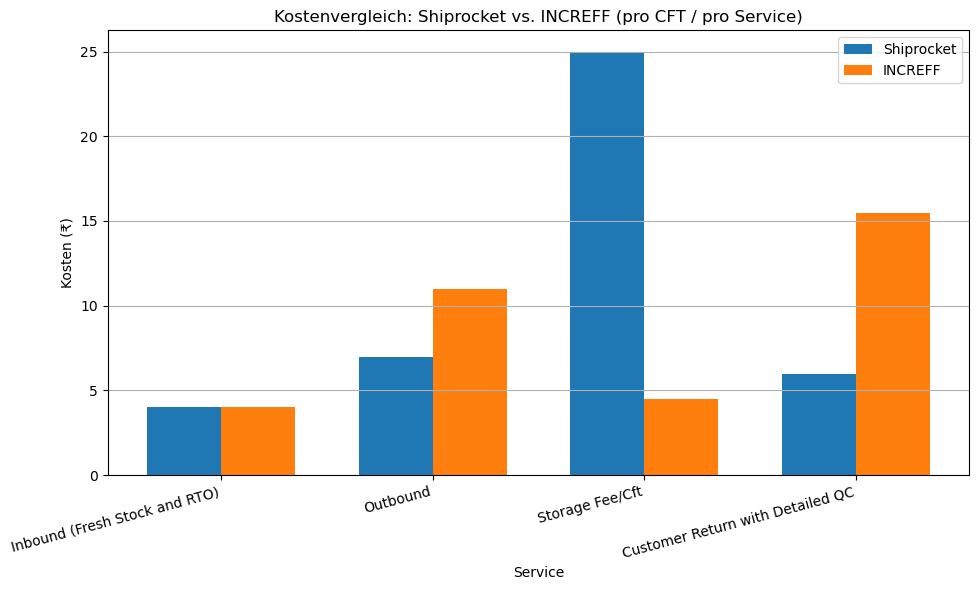

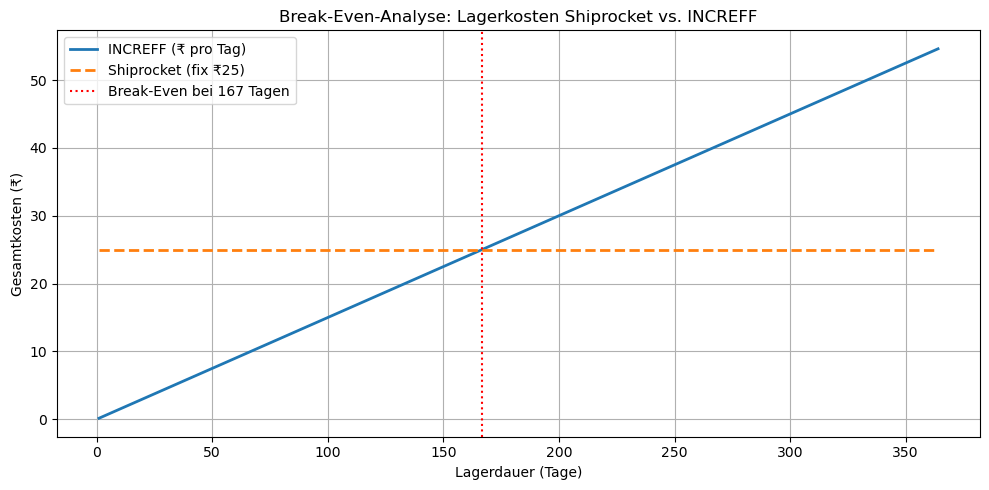


 Gewinn- und Verlustrechnung
             Kategorie  Betrag (₹)
             Einnahmen      4000.0
              Ausgaben     15810.0
Saldo (Gewinn/Verlust)    -11810.0
Meistverkaufter Style (nach Umsatz):
Style
SET268    185774.0 

Am wenigsten verkaufter Style (nach Umsatz):
Style
AN204    281.0 

Top 5 Styles nach Umsatz:
Style
SET268     185774.00
J0277      163083.00
J0242      130521.50
JNE3548    113786.50
J0012      106275.43 

Flop 5 Styles nach Umsatz:
Style
BL014    285.0
BL013    285.0
BL011    285.0
AN209    281.0
AN204    281.0
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment

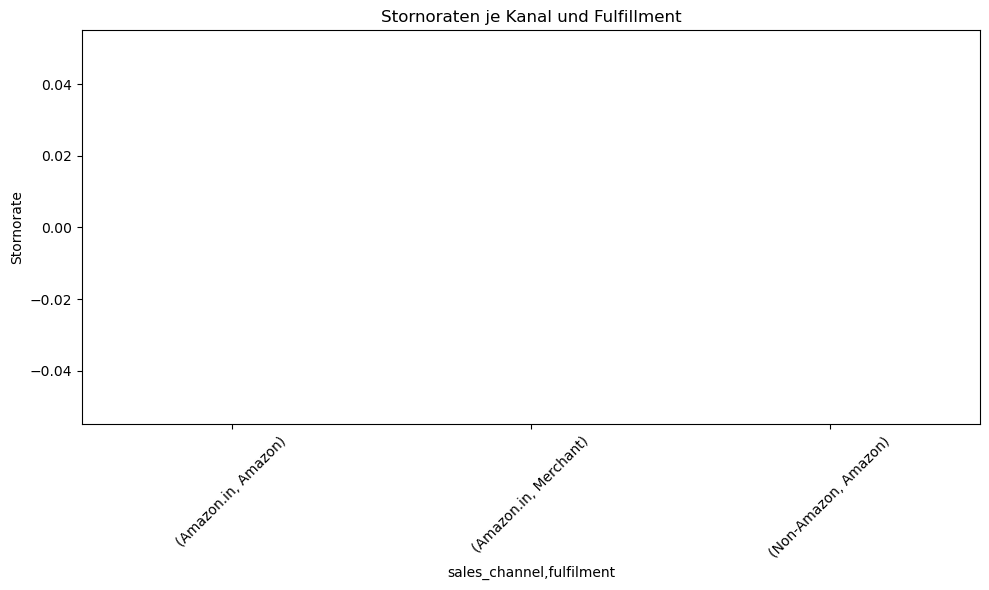

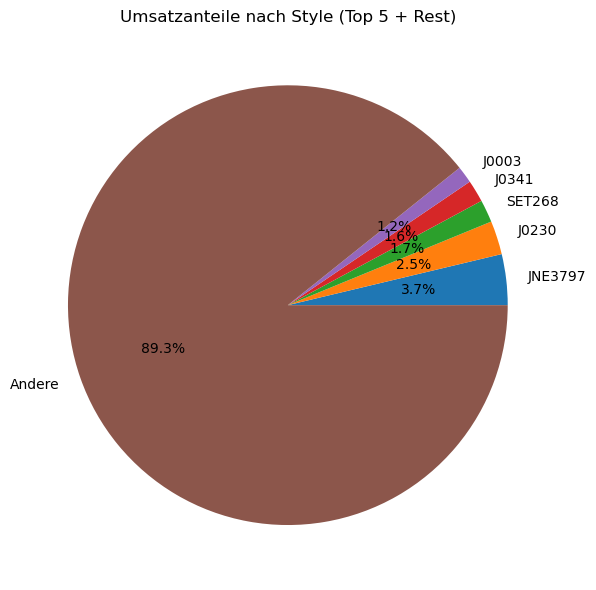

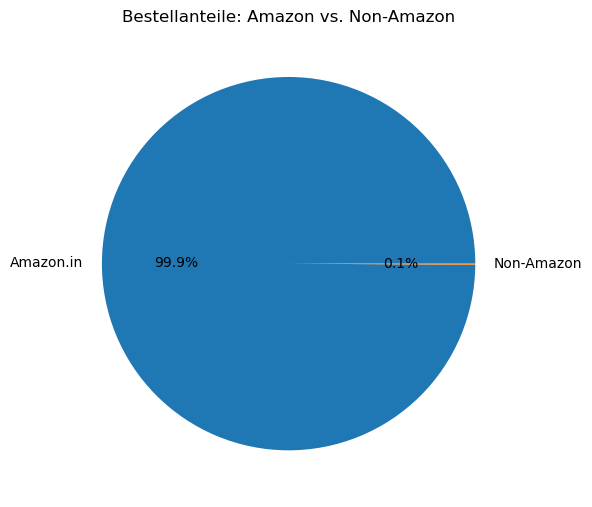

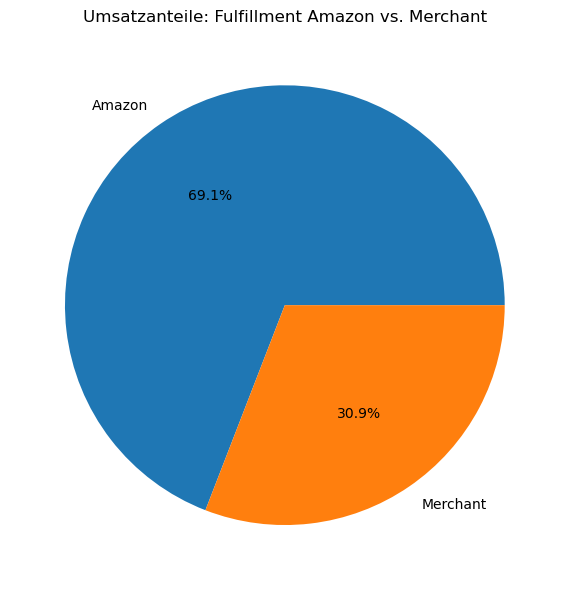

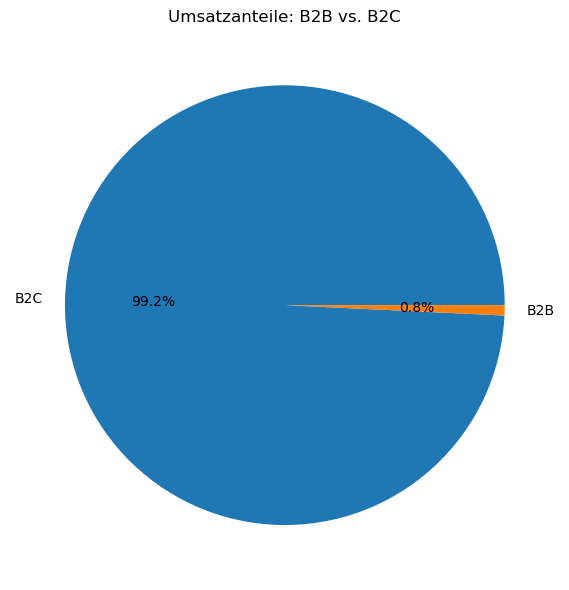

Bereinigte Sale Report.csv (erste 5 Zeilen):
   index       SKU Code Design No.  Stock       Category Size Color
0      0    AN201-RED-L      AN201    5.0  AN : LEGGINGS    L   Red
1      1    AN201-RED-M      AN201    5.0  AN : LEGGINGS    M   Red
2      2    AN201-RED-S      AN201    3.0  AN : LEGGINGS    S   Red
3      3   AN201-RED-XL      AN201    6.0  AN : LEGGINGS   XL   Red
4      4  AN201-RED-XXL      AN201    3.0  AN : LEGGINGS  XXL   Red

Form (Zeilen, Spalten): (9188, 7)

Datentypen:
index           int64
SKU Code       object
Design No.     object
Stock         float64
Category       object
Size           object
Color          object
dtype: object
Flop 10 Designs nach Lagerbestand:
Design_Code
JNE    115965.0
SET     55096.0
J       43958.0
BL       7162.0
BTM      6303.0
NW       3288.0
PJN      2692.0
SAR      2394.0
MEN      2241.0
JAN      2104.0
Name: Stock, dtype: float64


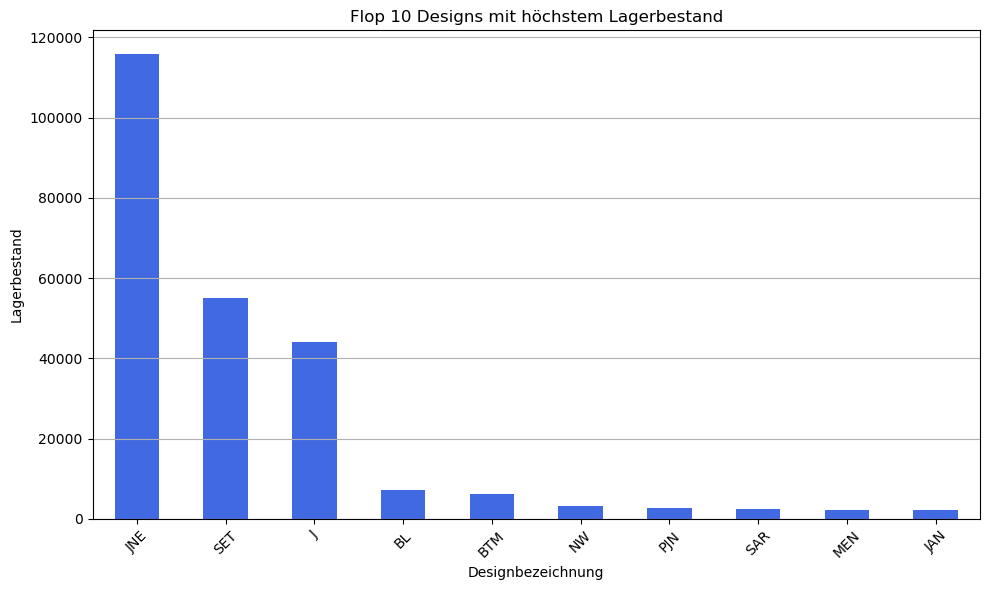


Flop 5 Einzelartikel nach Lagerbestand:
Design No.
JNE3405    4957.0
JNE1525    4808.0
SET273     3892.0
JNE3613    3421.0
JNE3368    3118.0
Name: Stock, dtype: float64


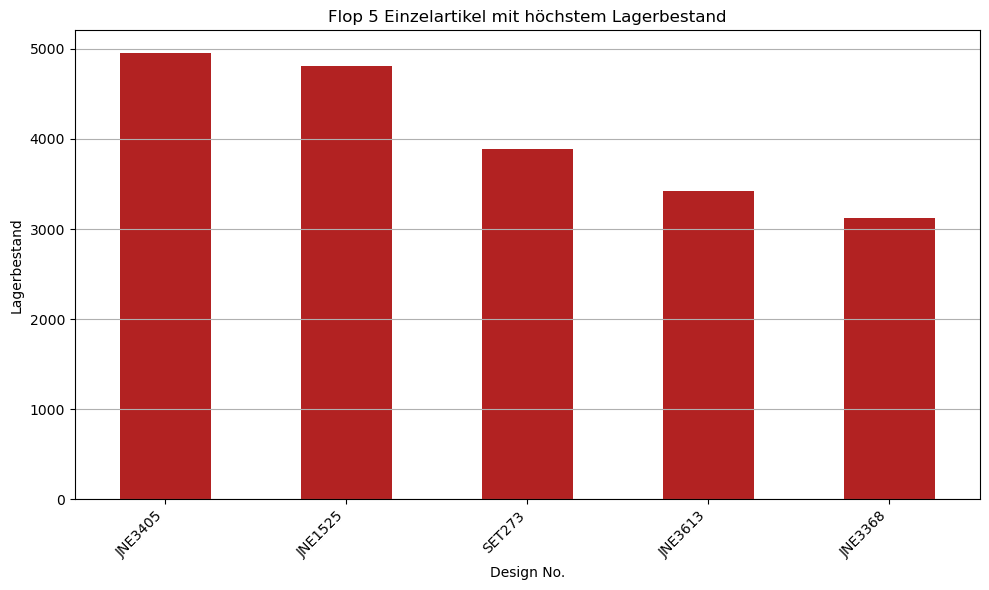


Katalog-Ranking:
             Style ID Count  Avg. Unique MRP
Catalog                                     
Mix                     136          2183.41
Surmaya                  32          2539.69
Rozana                    8          2495.00
Colors-8                  8          1895.00
Colors-7                  7          1595.00
Moments                   6          2295.00
Breeze-4                  6          2195.00
Four Gems 2               4          2895.00


In [3]:
# Bibliotheken laden und DataFrames einlesen
import pandas as pd
import matplotlib as plt
import numpy as np


df1 = pd.read_csv('Cloud Warehouse Compersion Chart.csv')
df2 = pd.read_csv('Expense IIGF.csv')
df3 = pd.read_csv('International sale Report.csv')
df4 = pd.read_csv('May-2022.csv')
df5 = pd.read_csv('P  L March 2021.csv')
df6 = pd.read_csv('Amazon Sale Report.csv', low_memory = False)
df7 = pd.read_csv('Sale Report.csv')

# Überblick
print("Cloud Warehouse Compersion Chart")
print(df1.head())

print("\nExpense IIGF")
print(df2.head())

print("\nInternational sale Report")
print(df3.head())

print("\nMay-2022")
print(df4.head())

print("\nP L March 2021")
print(df5.head())

print("\nAmazon Sale Report")
print(df6.head())

print("\nSale Report")
print(df7.head())


# BEREINIGUNG FÜR df1: Cloud Warehouse Comparison Chart

# Entferne die erste Zeile mit redundanten Spaltennamen
df1 = df1[1:].reset_index(drop=True)

# Neue Spaltennamen korrekt für 4 Spalten
df1.columns = ['index', 'service', 'shiprocket_raw', 'increff_raw']

# Nur die Zeilen mit Preisangaben verwenden (erste 4 Einträge)
df1 = df1.iloc[:4].copy()

# Shiprocket bereinigen
df1['shiprocket_price'] = df1['shiprocket_raw'].replace('[₹$,€,]', '', regex=True).astype(float)

# INCREFF bereinigen
df1['increff_price'] = df1['increff_raw'].astype(str).str.extract(r'(\d+\.?\d*)')[0]
df1['increff_price'] = pd.to_numeric(df1['increff_price'], errors='coerce')

# Fehlerhaften INCREFF-Wert korrigieren
df1.loc[df1['service'] == 'Customer Return with Detailed QC', 'increff_price'] = 15.5

# Preismodell-Hinweis
df1['notes'] = ''
df1.loc[df1['service'] == 'Storage Fee/Cft', 'notes'] = 'INCREFF: Rs/day, Shiprocket: monthly'

# Endgültiges Ergebnis anzeigen
print("\nBereinigte df1:")
print(df1[['service', 'shiprocket_price', 'increff_price', 'notes']])

# Ergebnis prüfen
print("\nBereinigte df1")
print(df1.head())
print("\nDatentypen:")
print(df1.dtypes)

#Bereinigung und Aufteilung der Tabellen in Einnahmen und Ausgaben 

# Entfernt die erste Zeile mit Bezeichnern wie "Particular", "Amount"

df_clean = df2[1:].reset_index(drop=True)

# Einnahmen vorbereiten
df_income = df_clean[['Recived Amount', 'Unnamed: 1']].dropna().copy()
df_income.columns = ['date', 'amount']
df_income['date'] = pd.to_datetime(df_income['date'], format="%m-%d-%Y", errors='coerce')
df_income['amount'] = pd.to_numeric(df_income['amount'], errors='coerce')

# Ausgaben vorbereiten
df_expense = df_clean[['Expance', 'Unnamed: 3']].dropna().copy()
df_expense.columns = ['category', 'amount']
df_expense['amount'] = pd.to_numeric(df_expense['amount'], errors='coerce')

print("Einnahmen:")
print(df_income.head())

print("\nAusgaben:")
print(df_expense.head())

# 1. CSV-Datei laden 
df_raw = pd.read_csv("Expense IIGF.csv")


# 2. Einnahmen extrahieren (Spalte 0 + 1)
income_raw = df_raw[['Recived Amount', 'Unnamed: 1']].copy()
income_raw.columns = ['date', 'amount']

# 3. Header-Zeile entfernen
income_data = income_raw.iloc[1:].reset_index(drop=True)

# 4. Datum konvertieren
income_data['date'] = pd.to_datetime(income_data['date'], format="%m-%d-%y", errors='coerce')

# 5. Betrag umwandeln in Float
income_data['amount'] = pd.to_numeric(income_data['amount'], errors='coerce')

# 6. "TOTAL"-Wert sichern und Zeile entfernen
total_income = income_data['amount'].iloc[-1]
income_data = income_data.drop(income_data.index[-1]).reset_index(drop=True)

# 7. Ausgabe
print(" Bereinigte Einnahmen:")
print(income_data)

print(f"\n TOTAL Einnahmen: {total_income}")

# CSV-Datei laden
df_sales = pd.read_csv("International sale Report.csv")

# 1. Konvertiere 'DATE' in echtes Datumsformat (Monat-Tag-Jahr)
df_sales['DATE'] = pd.to_datetime(df_sales['DATE'], format="%m-%d-%y", errors='coerce')

# 2. Spalten 'PCS', 'RATE', 'GROSS AMT' in Float umwandeln
# Nicht-numerische Inhalte (z. B. Text oder Sonderzeichen) werden automatisch zu NaN
for col in ['PCS', 'RATE', 'GROSS AMT']:
    df_sales[col] = pd.to_numeric(df_sales[col], errors='coerce')

# 3. Überblick über fehlende Werte (optional)
print("Anzahl fehlender Werte pro Spalte:")
print(df_sales.isna().sum())

# 4. Ergebnis anzeigen
print("\nBereinigte Datenvorschau:")
print(df_sales.head())

# CSV-Datei laden
df_may = pd.read_csv("May-2022.csv")

# 1. Ersetze "NILL" durch NaN in allen Spalten
df_may.replace("NILL", pd.NA, inplace=True)

# 2. Konvertiere 'Weight' in float
df_may['Weight'] = pd.to_numeric(df_may['Weight'], errors='coerce')

# 3. Liste der Preis-Spalten
price_columns = [
    'TP', 'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP',
    'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP',
    'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP'
]

# 4. Konvertiere alle Preis-Spalten in float (NaN bei ungültigen Werten)
for col in price_columns:
    df_may[col] = pd.to_numeric(df_may[col], errors='coerce')

# 5. Vorschau und Datentypen prüfen
print("Bereinigte Daten (Beispielzeilen):")
print(df_may.head())

print("\n Datentypenübersicht:")
print(df_may.dtypes)

# CSV-Datei laden
df_march_2021 = pd.read_csv("P  L March 2021.csv")

# 1. Ersetze "NILL" durch NaN in allen Spalten
df_march_2021.replace("NILL", pd.NA, inplace=True)

# 2. Konvertiere 'Weight', 'TP 1' und 'TP 2' in float
df_march_2021['Weight'] = pd.to_numeric(df_march_2021['Weight'], errors='coerce')
df_march_2021['TP 1'] = pd.to_numeric(df_march_2021['TP 1'], errors='coerce')
df_march_2021['TP 2'] = pd.to_numeric(df_march_2021['TP 2'], errors='coerce')

# 3. Liste der Preis-Spalten zur Umwandlung
price_columns_2021 = [
    'MRP Old', 'Final MRP Old', 'Ajio MRP', 'Amazon MRP',
    'Amazon FBA MRP', 'Flipkart MRP', 'Limeroad MRP',
    'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP'
]

# 4. Alle Plattformpreis-Spalten in float konvertieren
for col in price_columns_2021:
    df_march_2021[col] = pd.to_numeric(df_march_2021[col], errors='coerce')

# 5. Vorschau anzeigen (optional)
print("Bereinigte März 2021-Daten (Beispiel):")
print(df_march_2021.head())

print("\nDatentypenübersicht:")
print(df_march_2021.dtypes)


# CSV-Datei laden
df_amazon = pd.read_csv("Amazon Sale Report.csv", low_memory=False)

# 1. Entferne die überflüssige Spalte, falls vorhanden
if 'Unnamed: 22' in df_amazon.columns:
    df_amazon.drop(columns=['Unnamed: 22'], inplace=True)

# 2. Konvertiere das Datum in datetime-Format (Format: MM-DD-YY)
df_amazon['Date'] = pd.to_datetime(df_amazon['Date'], format='%m-%d-%y', errors='coerce')

# 3. Vorschau (optional)
print("Bereinigter Amazon Sales Report (Beispielzeilen):")
print(df_amazon.head())

print("\n Datentypenübersicht:")
print(df_amazon.dtypes)

# Analyse der Warehouse Lagerbestandspreise von den beiden Anbietern Shiprocket und INCREFF

import matplotlib.pyplot as plt


# Vergleichsdaten definieren
vergleichsdaten = {
    'Service': ['Inbound (Fresh Stock and RTO)', 'Outbound', 'Storage Fee/Cft', 'Customer Return with Detailed QC'],
    'Shiprocket (₹)': [4.0, 7.0, 25.0, 6.0],
    'INCREFF (₹)': [4.0, 11.0, 0.15 * 30, 15.5]  # 0.15 ₹/Tag × 30 Tage
}

# In DataFrame umwandeln
df_vergleich = pd.DataFrame(vergleichsdaten)

# Visualisierung: Gruppierter Balkenvergleich
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(df_vergleich))

plt.bar(index, df_vergleich['Shiprocket (₹)'], bar_width, label='Shiprocket')
plt.bar([i + bar_width for i in index], df_vergleich['INCREFF (₹)'], bar_width, label='INCREFF')

plt.xlabel('Service')
plt.ylabel('Kosten (₹)')
plt.title('Kostenvergleich: Shiprocket vs. INCREFF (pro CFT / pro Service)')
plt.xticks([i + bar_width / 2 for i in index], df_vergleich['Service'], rotation=15, ha='right')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Break-Even-Berechnung
# Kostenformeln:
# Shiprocket: 25 ₹ (fix pro Monat)
# INCREFF: 0.15 ₹ pro Tag

# Berechnung Break-Even-Tage
break_even_tage = 25 / 0.15  # Tage, bei denen beide Anbieter gleich teuer sind

# Tagesbereich für Simulation
tage = list(range(1, 365))
increff_kosten = [0.15 * t for t in tage]
shiprocket_kosten = [25 for _ in tage]

# In DataFrame
df_kosten = pd.DataFrame({
    'Tage': tage,
    'INCREFF': increff_kosten,
    'Shiprocket': shiprocket_kosten
})

# Visualisierung
plt.figure(figsize=(10, 5))
plt.plot(df_kosten['Tage'], df_kosten['INCREFF'], label='INCREFF (₹ pro Tag)', linewidth=2)
plt.plot(df_kosten['Tage'], df_kosten['Shiprocket'], label='Shiprocket (fix ₹25)', linestyle='--', linewidth=2)
plt.axvline(x=break_even_tage, color='red', linestyle=':', label=f'Break-Even bei {break_even_tage:.0f} Tagen')
plt.title('Break-Even-Analyse: Lagerkosten Shiprocket vs. INCREFF')
plt.xlabel('Lagerdauer (Tage)')
plt.ylabel('Gesamtkosten (₹)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Expense IIGF Bilanzübersicht Gewinn-und Verlustrechnung

# CSV-Datei laden
df_expense = pd.read_csv("Expense IIGF.csv", low_memory=False)

# 1. Einnahmen extrahieren (Zeilen 2–5, Spalten B & C)
einnahmen_df = df_expense.iloc[2:6, [1, 2]].copy()
einnahmen_df.columns = ['date', 'amount']
einnahmen_df['date'] = pd.to_datetime(einnahmen_df['date'], format='%m-%d-%y', errors='coerce')
einnahmen_df['amount'] = pd.to_numeric(einnahmen_df['amount'], errors='coerce')

# 2. Ausgaben extrahieren (Zeilen 2–14, Spalten D & E)
ausgaben_df = df_expense.iloc[2:15, [3, 4]].copy()
ausgaben_df.columns = ['description', 'amount']
ausgaben_df['amount'] = pd.to_numeric(ausgaben_df['amount'], errors='coerce')

# 3. Summen berechnen
summe_einnahmen = einnahmen_df['amount'].sum(skipna=True)
summe_ausgaben = ausgaben_df['amount'].sum(skipna=True)
gewinn_verlust = summe_einnahmen - summe_ausgaben

# 4. Bilanz als DataFrame
bilanz = pd.DataFrame({
    'Kategorie': ['Einnahmen', 'Ausgaben', 'Saldo (Gewinn/Verlust)'],
    'Betrag (₹)': [summe_einnahmen, summe_ausgaben, gewinn_verlust]
})

# 5. Ausgabe
print("\n Gewinn- und Verlustrechnung")
print(bilanz.to_string(index=False))


# Bereinigte CSV-Datei laden
df = pd.read_csv("international_sales_bereinigt.csv", low_memory=False)

# Datentypen korrekt setzen
df['GROSS AMT'] = pd.to_numeric(df['GROSS AMT'], errors='coerce')
df['Style'] = df['Style'].str.upper()  # Einheitliche Schreibweise

# Nach Umsatz pro Style gruppieren
style_revenue = df.groupby('Style')['GROSS AMT'].sum().sort_values(ascending=False)

# Meistverkaufter und am wenigsten verkaufter Style (nach Umsatz)
most_revenue = style_revenue.head(1)
least_revenue = style_revenue.tail(1)

# Top 5 und Flop 5 Styles nach Umsatz
top_5_styles = style_revenue.head(5)
flop_5_styles = style_revenue.tail(5)

# Ausgabe 
print("Meistverkaufter Style (nach Umsatz):")
print(most_revenue.to_string(), "\n")

print("Am wenigsten verkaufter Style (nach Umsatz):")
print(least_revenue.to_string(), "\n")

print("Top 5 Styles nach Umsatz:")
print(top_5_styles.to_string(), "\n")

print("Flop 5 Styles nach Umsatz:")
print(flop_5_styles.to_string())



# Excel-Datei laden
df = pd.read_csv("Amazon Sale Report.csv", low_memory = False)

# Überblick verschaffen
print(df.head())
print(df.columns)
print(df.columns.tolist())

# Spaltennamen bereinigen: Leerzeichen entfernen, alles klein schreiben und Unterstriche einfügen
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()


# Cancel Rates Stornoraten von Sales Channel und Fulfillment
cancel_rates = df[df["status"] == "cancelled"].groupby(["sales_channel", "fulfilment"])["order_id"].count() / \
df.groupby(["sales_channel", "fulfilment"])["order_id"].count()
print(cancel_rates)

# Barplot zur Visualisierung
cancel_rates.plot(kind="bar", figsize=(10, 6))
plt.title("Stornoraten je Kanal und Fulfillment")
plt.ylabel("Stornorate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Style Amounts Top 5 Styles + Rest 
style_amounts = df.groupby("style")["amount"].sum().sort_values(ascending=False)
top_5_styles = style_amounts[:5]
rest_styles = pd.Series(style_amounts[5:].sum(), index=["Andere"])
style_pie = pd.concat([top_5_styles, rest_styles])

style_pie.plot.pie(autopct="%1.1f%%", figsize=(8, 6))
plt.title("Umsatzanteile nach Style (Top 5 + Rest)")
plt.ylabel("")
plt.tight_layout()
plt.show()


# Amazon vs. Non-Amazon (Bestellanteile)
channel_orders = df.groupby("sales_channel")["order_id"].count()
channel_orders_pct = channel_orders / channel_orders.sum()
channel_orders_pct.plot.pie(autopct="%1.1f%%", figsize=(6, 6))
plt.title("Bestellanteile: Amazon vs. Non-Amazon")
plt.ylabel("")
plt.tight_layout()
plt.show()


# Fulfillment-Anteile (Umsatz)
fulfillment_share = df.groupby("fulfilment")["amount"].sum()
fulfillment_share_pct = fulfillment_share / fulfillment_share.sum()
fulfillment_share_pct.plot.pie(autopct="%1.1f%%", figsize=(6, 6))
plt.title("Umsatzanteile: Fulfillment Amazon vs. Merchant")
plt.ylabel("")
plt.tight_layout()
plt.show()


# B2B vs. B2C (Umsatz)
b2b_share = df.groupby("b2b")["amount"].sum()
b2b_share_pct = b2b_share / b2b_share.sum()
# Wenn True = B2B und False = B2C
b2b_labels = ["B2C", "B2B"] if False in b2b_share.index else ["B2B", "B2C"]

b2b_share_pct.plot.pie(labels=b2b_labels, autopct="%1.1f%%", figsize=(6, 6))
plt.title("Umsatzanteile: B2B vs. B2C")
plt.ylabel("")
plt.tight_layout()
plt.show()

# Datei laden
df7 = pd.read_csv("Sale Report.csv", low_memory=False)

# 1. Entferne alle Zeilen ab Index 9235 (entspricht Zeile 9236 inkl. Header = leere Daten)
df7 = df7.iloc[:9235].copy()

# 2. Entferne alle Zeilen, die mindestens einen NULL-Wert enthalten
df7_clean = df7.dropna(how='any').reset_index(drop=True)

# 3. Überblick über Ergebnis
print("Bereinigte Sale Report.csv (erste 5 Zeilen):")
print(df7_clean.head())

print("\nForm (Zeilen, Spalten):", df7_clean.shape)
print("\nDatentypen:")
print(df7_clean.dtypes)


# Bereinigten DataFrame 
df7_clean["Stock"] = pd.to_numeric(df7_clean["Stock"], errors="coerce")

# Zeichenfilterung: Erste 1–3 Buchstaben aus Design No.
df7_clean["Design_Code"] = df7_clean["Design No."].astype(str).str.extract(r'^([A-Za-z]{1,3})')[0].str.upper()

###  FLOP 10 Designs nach Lagerbestand 
flop_10_designs = df7_clean.groupby("Design_Code")["Stock"].sum().sort_values(ascending=False).head(10)

print("Flop 10 Designs nach Lagerbestand:")
print(flop_10_designs)

#  Balkendiagramm – Flop Designs
flop_10_designs.plot(kind="bar", figsize=(10, 6), color="royalblue")
plt.title("Flop 10 Designs mit höchstem Lagerbestand")
plt.xlabel("Designbezeichnung")
plt.ylabel("Lagerbestand")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

### Flop 5 Einzelartikel nach Lagerbestand
flop_5_items = df7_clean.groupby("Design No.")["Stock"].sum().sort_values(ascending=False).head(5)

print("\nFlop 5 Einzelartikel nach Lagerbestand:")
print(flop_5_items)

# Balkendiagramm – Einzelartikel
flop_5_items.plot(kind="bar", figsize=(10, 6), color="firebrick")
plt.title("Flop 5 Einzelartikel mit höchstem Lagerbestand")
plt.xlabel("Design No.")
plt.ylabel("Lagerbestand")
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# MRP Plattformen und Styles pro Katalog im Mai 2022


import pandas as pd

# CSV laden
df = pd.read_csv("May-2022.csv")

# "NILL" durch NaN ersetzen
df.replace("NILL", pd.NA, inplace=True)

# MRP-Spalten definieren
mrp_cols = ['Ajio MRP', 'Amazon MRP', 'Amazon FBA MRP', 'Flipkart MRP',
            'Limeroad MRP', 'Myntra MRP', 'Paytm MRP', 'Snapdeal MRP']

# MRP-Spalten in Float konvertieren
for col in mrp_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Entferne Zeilen mit fehlenden Catalog oder Style Id
df = df.dropna(subset=['Catalog', 'Style Id'])

# Entferne Zeilen mit "Nill"-artigen Catalog-Bezeichnungen
df = df[~df['Catalog'].str.lower().isin(['nill', 'nil', 'nill ', 'null'])]

# Entferne Zeilen, bei denen alle MRP-Werte fehlen
df_valid_mrp = df.dropna(subset=mrp_cols, how='all').copy()

# Berechne Mittelwert aus einzigartigen MRP-Werten pro Zeile
def row_unique_mrp_mean(row):
    unique_mrps = pd.Series(row[mrp_cols].dropna().unique())
    return unique_mrps.mean() if not unique_mrps.empty else pd.NA

df_valid_mrp['avg_unique_mrp'] = df_valid_mrp.apply(row_unique_mrp_mean, axis=1)

# Anzahl Style IDs pro Catalog
style_id_counts = df_valid_mrp.groupby('Catalog')['Style Id'].nunique()

# Durchschnittlicher MRP pro Catalog
avg_mrp_per_catalog = df_valid_mrp.groupby('Catalog')['avg_unique_mrp'].mean()

# Zusammenführen und Sortieren
summary = pd.DataFrame({
    'Style ID Count': style_id_counts,
    'Avg. Unique MRP': avg_mrp_per_catalog
}).dropna()

summary_sorted = summary.sort_values(by=['Style ID Count', 'Avg. Unique MRP'], ascending=False)

# Ausgabe
print("\nKatalog-Ranking:")
print(summary_sorted.round(2))



# Exportieren mit Encoding (UTF-8 für Excel lesbar)
df1.to_csv("bereinigt_cloud_warehouse.csv", index=False, encoding="utf-8-sig")
df_income.to_csv("bereinigt_income.csv", index=False, encoding="utf-8-sig")
df_expense.to_csv("bereinigt_expense.csv", index=False, encoding="utf-8-sig")
df_sales.to_csv("bereinigt_international_sales.csv", index=False, encoding="utf-8-sig")
df_may.to_csv("bereinigt_may_2022.csv", index=False, encoding="utf-8-sig")
df_march_2021.to_csv("bereinigt_march_2021.csv", index=False, encoding="utf-8-sig")
df_amazon.to_csv("bereinigt_amazon_sales.csv", index=False, encoding="utf-8-sig")
df7_clean.to_csv("bereinigt_stock_report.csv", index=False, encoding="utf-8-sig")
df_valid_mrp.to_csv("bereinigt_mrp_catalog.csv", index=False, encoding="utf-8-sig")
summary_sorted.to_csv("mrp_katalog_summary.csv", index=False, encoding="utf-8-sig")








